

# Investigation of No-Show Appointment Dataset
### By Chase Eby

## Table of Contents

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collected information of over 110k medical appointments in Brazil. The dataset includes 14 variables which describes individual health characteristics of patients and whether or not they showed up to their medical appointment or didn't show up.  

## Variables used for analysis
> The Independent Variable.

> No_Show: No = The patient did show up for their appointment.  Yes = The patient did not show up for their appointment.
  
> The Dependent Variables

> Scholarship: 1 = Patient has access to goverment assistance with their healthcare. 0 = Patient does not have access to government assistance with their healthcare.

> SMS_recieved: 1 = Patient recived a SMS message reminding them of their medical appointment. 
> 0 = Patient did not recive a SMS message.

> Alcoholism: 1 = Patient has alcoholism. 0 = Patient does not have Alcoholism

> Using these variables, is there a relationship to the patient not showing up to their appointment? 


In [2]:
#import packages
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [3]:
#load dataset
df = pd.read_csv('noshowappointments.csv')

In [4]:
#Look at the head of the dataset.
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [110]:
#Check the size of the dataset
df.shape

(110527, 14)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [19]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 

In [20]:
## check for duplicates
print(df.duplicated().sum())

0


In [5]:
#Drop Patientid and Appointmentid - Not useful for our analysis.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [6]:
#Make sure Patientid and AppointmentID have been removed from the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighbourhood   110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hipertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handcap         110527 non-null  int64 
 10  SMS_received    110527 non-null  int64 
 11  No-show         110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


In [7]:
#Fix issues with the column names of datasets.  
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow','Neighbourhood': 'Neighborhood'})

In [8]:
#Check to see if the names have been updated in the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Gender          110527 non-null  object
 1   ScheduledDay    110527 non-null  object
 2   AppointmentDay  110527 non-null  object
 3   Age             110527 non-null  int64 
 4   Neighborhood    110527 non-null  object
 5   Scholarship     110527 non-null  int64 
 6   Hypertension    110527 non-null  int64 
 7   Diabetes        110527 non-null  int64 
 8   Alcoholism      110527 non-null  int64 
 9   Handicap        110527 non-null  int64 
 10  SMSReceived     110527 non-null  int64 
 11  NoShow          110527 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.1+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> Exlore the No-Show Appointment dataset and make conclusions based on this dataset.  

### Do variables such as SMSReceived, Alchoholism, and Scholarship have an effect whether or not a patient shows up to their appointment?


In [9]:
#Number of patients that made their appointment
ma = df.groupby(['NoShow']).size()[0]
#Number of patients that didn't make their appointment
ns = df.groupby(['NoShow']).size()[1]

print('{}, is the number of patients that showed up to their appointments'.format(ma))

print('{}, is the number of patients that did not show up to their appointments'.format(ns))

88208, is the number of patients that showed up to their appointments
22319, is the number of patients that did not show up to their appointments


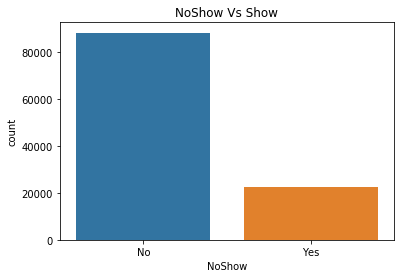

In [99]:
#Plot of People 
ax = sns.countplot(x=df.NoShow, data = df)
ax.set_title('NoShow Vs Show')
plt.show()

> The above graph represents the number of patients that did not show up to their appointment.   

>What other relationships can be related to patients not showing up their appointments.

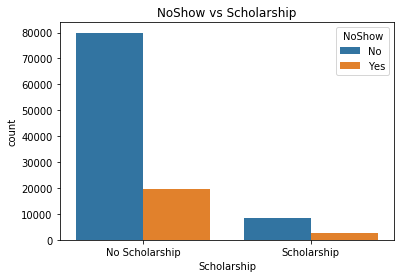

In [10]:
ax = sns.countplot(df.Scholarship, hue=df.NoShow, data=df)
ax.set_title("NoShow vs Scholarship")
x_labels = ['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_labels)
plt.show()

Text(0.5, 1.0, 'Violinplot')

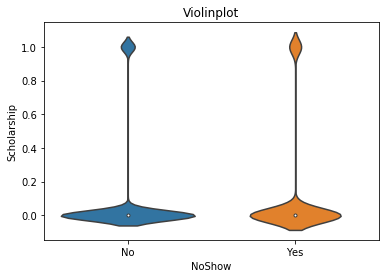

In [34]:
ax = sns.violinplot(x='NoShow',y='Scholarship', data = df)
ax.set_title("Violinplot")

In [35]:
df_sch_r = df[df.NoShow == 'No'].groupby(['Scholarship']).size()/df.groupby(['Scholarship']).size()
df_sch_r

Scholarship
0    0.801928
1    0.762637
dtype: float64

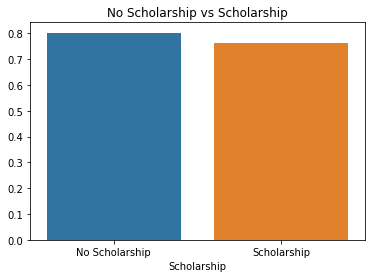

In [148]:
ax = sns.barplot(x=df_sch_r.index, y=df_sch_r, )
ax.set_title("No Scholarship vs Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

>The graphs above looks into the relationship that being on government assistance and patients showing up to their appointments.  As the graph above shows patients with a scholarship show up less to their appointments than those who do have a scholarship.

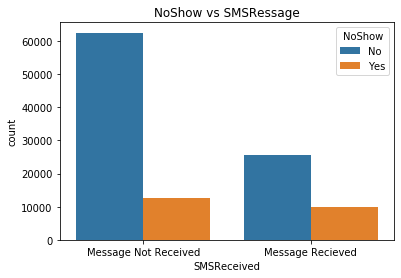

In [36]:
ax = sns.countplot(df.SMSReceived, hue=df.NoShow, data=df)
ax.set_title("NoShow vs SMSRessage")
x_labels = ['Message Not Received', 'Message Recieved']
ax.set_xticklabels(x_labels)
plt.show()

Text(0.5, 1.0, 'Violin Plot')

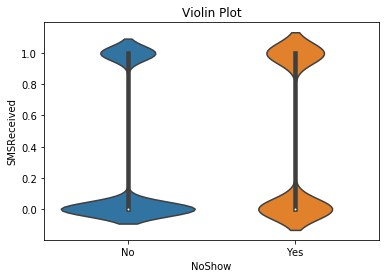

In [37]:
ax = sns.violinplot(x='NoShow',y='SMSReceived', data = df)
ax.set_title("Violin Plot")

>The graph above represents the relationship between patients recieving a message reminding them of their appointment and whether or not they showed up to their appointment.  As you can see there is a strong relationship between reciveving a message reminding the patient and showing up to the medical appointment. 


In [38]:
df_sms_r = df[df.NoShow == 'No'].groupby(['SMSReceived']).size()/df.groupby(['SMSReceived']).size()
df_sms_r

SMSReceived
0    0.832967
1    0.724255
dtype: float64

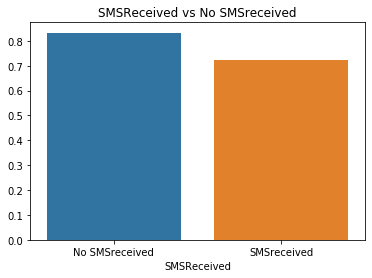

In [39]:
ax = sns.barplot(x=df_sms_r.index, y=df_sms_r, )
ax.set_title("SMSReceived vs No SMSreceived")
x_ticks_labels=['No SMSreceived', 'SMSreceived']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> The graphs above show that there is slight negative relation between patients receiving a SMS message and that patient showing up to their appointments.  This seems suprising we might have assumed that reciveing a reminder message would cause more patients to show up.  The dataset doesnt really explain the kind of messaged that the patient recieves but it may be worth looking into further. 

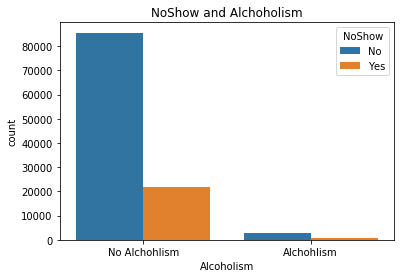

In [40]:
ax = sns.countplot(df.Alcoholism, hue=df.NoShow, data=df)
ax.set_title("NoShow and Alchoholism")
x_labels = ['No Alchohlism', 'Alchohlism']
ax.set_xticklabels(x_labels)
plt.show()

Text(0.5, 1.0, 'Violinplot')

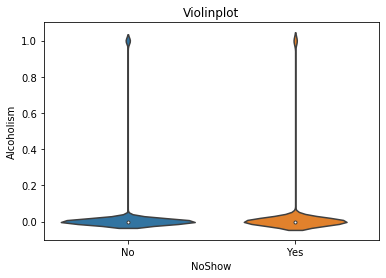

In [33]:
ax = sns.violinplot(x='NoShow',y='Alcoholism', data = df)
ax.set_title("Violinplot")

In [41]:
df_alco_r = df[df.NoShow == 'No'].groupby(['Alcoholism']).size()/df.groupby(['Alcoholism']).size()
df_alco_r

Alcoholism
0    0.798054
1    0.798512
dtype: float64

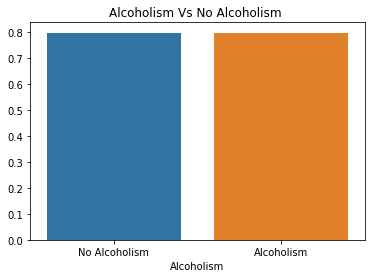

In [42]:
ax = sns.barplot(x=df_alco_r.index, y=df_alco_r, )
ax.set_title("Alcoholism Vs No Alcoholism ")
x_ticks_labels=['No Alcoholism', 'Alcoholism']
ax.set_xticklabels(x_ticks_labels)
plt.show()

> As we can see there isn't any decernable difference between patients with Alchoholism and those without.  Using this data we can see that Alcoholism is not a factor in whether patients show up to their appointments. 

<a id='conclusions'></a>
## Conclusions

>After analyzing the three dependant varaiables SMSReceived, Alchoholism, and Scholarship we can see some very interesting interactions with the NoShow independent variables. 

>The most interesting interaction that I analyzed was betweeen the variable SMSRecieved and NoShow.  I had thought that I would see that a SMS message would drasticly reduce the number of missed appointments.  However there was a opposite reaction that occured with the variables.  People who received a SMS message showed up to their appointments at a lower rate than those who had no SMS message.  

>The variable Alcoholism had no effect on whether or not a patient showed up to their appointment.  This was another suprize I would have suspected that patients with Alcoholism would show up at a lower rate to their appointments.  

>The last interaction between Scholarship and NoShow was also suprising because those who did not have a government scholarship showed up at a higher rate than those who did.  

> Although these variables did not have the reaction that I had suspected, this could be due to many different factors that we aren't accounting for.  We may want to use this exploritory analysis to come up with more questions to ask for further examination.  


